In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
file_path = 'PS_2025.04.01_18.21.30.csv'

exoplanets = pd.read_csv(file_path, sep=',', header=0)

In [147]:
exoplanets.info()
exoplanets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38182 non-null  object 
 1   hostname         38182 non-null  object 
 2   default_flag     38182 non-null  int64  
 3   sy_snum          38182 non-null  int64  
 4   sy_pnum          38182 non-null  int64  
 5   discoverymethod  38182 non-null  object 
 6   pl_orbper        34995 non-null  float64
 7   pl_orbsmax       21601 non-null  float64
 8   pl_rade          26470 non-null  float64
 9   pl_radj          26470 non-null  float64
 10  pl_bmasse        6404 non-null   float64
 11  pl_bmassj        6403 non-null   float64
 12  pl_bmassprov     6404 non-null   object 
 13  pl_orbeccen      18429 non-null  float64
 14  pl_eqt           16739 non-null  float64
 15  st_teff          35179 non-null  float64
 16  st_rad           35227 non-null  float64
 17  st_mass     

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass
0,11 Com b,11 Com,0,2,1,Radial Velocity,NaN,1.210,NaN,NaN,5434.700000,17.100,Msini,NaN,NaN,NaN,NaN,2.60
1,11 Com b,11 Com,0,2,1,Radial Velocity,326.03000,1.290,NaN,NaN,6165.600000,19.400,Msini,0.231,NaN,4742.0,19.00,2.70
2,11 Com b,11 Com,1,2,1,Radial Velocity,323.21000,1.178,NaN,NaN,4914.898486,15.464,Msini,0.238,NaN,4874.0,13.76,2.09
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,516.21997,1.530,NaN,NaN,4684.814200,14.740,Msini,0.080,NaN,4213.0,29.79,2.78
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,NaN,1.510,NaN,NaN,3432.400000,10.800,Msini,NaN,NaN,NaN,NaN,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38177,ups And d,ups And,0,2,3,Radial Velocity,1319.00000,2.570,NaN,NaN,1255.380000,3.950,Msini,0.269,NaN,NaN,NaN,NaN
38178,ups Leo b,ups Leo,1,1,1,Radial Velocity,385.20000,1.180,NaN,NaN,162.092488,0.510,Msini,0.320,NaN,4836.0,11.22,1.48
38179,xi Aql b,xi Aql,0,1,1,Radial Velocity,NaN,0.580,NaN,NaN,642.000000,2.020,Msini,NaN,NaN,NaN,NaN,1.40
38180,xi Aql b,xi Aql,0,1,1,Radial Velocity,136.75000,0.680,NaN,NaN,890.000000,2.800,Msini,0.000,NaN,4780.0,12.00,2.20


In [148]:
nan_df = exoplanets.isnull().sum() * 100 / (exoplanets.count() + exoplanets.isnull().sum())
nan_df

pl_name             0.000000
hostname            0.000000
default_flag        0.000000
sy_snum             0.000000
sy_pnum             0.000000
discoverymethod     0.000000
pl_orbper           8.346865
pl_orbsmax         43.426222
pl_rade            30.674140
pl_radj            30.674140
pl_bmasse          83.227699
pl_bmassj          83.230318
pl_bmassprov       83.227699
pl_orbeccen        51.733801
pl_eqt             56.159971
st_teff             7.864963
st_rad              7.739249
st_mass            15.151118
dtype: float64

In [149]:
# Calculate the number of NaN/None values in each column
nan_counts = exoplanets.isnull().sum()

# Calculate the percentage of missing values for each column
total_rows = len(exoplanets)
missing_percentage = (nan_counts / total_rows) * 100

# Combine the results into a DataFrame for better readability
missing_values = pd.DataFrame({
    'NaN/None Count': nan_counts,
    'Missing Percentage (%)': missing_percentage
})

# Display the result
print(missing_values)

                 NaN/None Count  Missing Percentage (%)
pl_name                       0                0.000000
hostname                      0                0.000000
default_flag                  0                0.000000
sy_snum                       0                0.000000
sy_pnum                       0                0.000000
discoverymethod               0                0.000000
pl_orbper                  3187                8.346865
pl_orbsmax                16581               43.426222
pl_rade                   11712               30.674140
pl_radj                   11712               30.674140
pl_bmasse                 31778               83.227699
pl_bmassj                 31779               83.230318
pl_bmassprov              31778               83.227699
pl_orbeccen               19753               51.733801
pl_eqt                    21443               56.159971
st_teff                    3003                7.864963
st_rad                     2955                7

In [150]:
df = exoplanets.drop(columns=['pl_bmasse', 'pl_bmassj', 'pl_bmassprov'], axis=1).copy()
df = df.dropna(subset=['pl_rade', 'pl_eqt']).copy()


In [151]:
nan_df_new = df.isnull().sum() * 100 / (df.count() + df.isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16494 entries, 30 to 38133
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          16494 non-null  object 
 1   hostname         16494 non-null  object 
 2   default_flag     16494 non-null  int64  
 3   sy_snum          16494 non-null  int64  
 4   sy_pnum          16494 non-null  int64  
 5   discoverymethod  16494 non-null  object 
 6   pl_orbper        16447 non-null  float64
 7   pl_orbsmax       15209 non-null  float64
 8   pl_rade          16494 non-null  float64
 9   pl_radj          16494 non-null  float64
 10  pl_orbeccen      14488 non-null  float64
 11  pl_eqt           16494 non-null  float64
 12  st_teff          16431 non-null  float64
 13  st_rad           16445 non-null  float64
 14  st_mass          15305 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 2.0+ MB


In [152]:
def classify_habitability(row):
    radius = row['pl_rade']     # in Earth radii
    eq_temp = row['pl_eqt']     # in Kelvin

    if radius >= 8:  # Very large, likely a Jupiter-class gas giant
        if eq_temp > 500:
            return 'Hot Jupiters'
        else:
            return 'Cold Jupiters'
    elif radius < 2.5:  # Terrestrial size range
        if 180 <= eq_temp <= 310:
            return 'Habitable Terrestrial'
        elif 100 <= eq_temp < 180 or 310 < eq_temp <= 400:
            return 'Semi-Habitable Terrestrial'
        else:
            return 'Not-Habitable Terrestrial'
    else:
        # Between 2.5 and 8 Earth radii — likely sub-Neptune or Neptune-class,
        # treat conservatively as non-habitable
        return 'Not-Habitable Terrestrial'

In [153]:
df['habitability_class'] = df.apply(classify_habitability, axis=1)
df['habitability_class'].value_counts()

habitability_class
Not-Habitable Terrestrial     13616
Hot Jupiters                   1942
Semi-Habitable Terrestrial      462
Habitable Terrestrial           286
Cold Jupiters                   188
Name: count, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.inspection import permutation_importance


In [155]:
df.drop(columns=['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum'])

,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass,habitability_class
30,Imaging,NaN,330.00000,18.647000,1.664000,NaN,1800.00,4060.00,1.352000,0.850000,Hot Jupiters
37,Imaging,NaN,NaN,11.209000,1.000000,NaN,1600.00,3309.00,0.366450,0.353185,Hot Jupiters
113,Radial Velocity,0.736546,NaN,2.023112,0.180490,NaN,1831.27,5250.00,0.963515,NaN,Not-Habitable Terrestrial
114,Radial Velocity,0.736544,0.01544,2.080000,0.185565,0.061,1958.00,5234.00,0.943000,0.905000,Not-Habitable Terrestrial
167,Transit,8.463000,0.06450,4.070000,0.363102,0.000,593.00,3700.00,0.750000,0.500000,Not-Habitable Terrestrial
...,...,...,...,...,...,...,...,...,...,...,...
38065,Imaging,NaN,8.90000,16.800000,1.500000,NaN,1650.00,8038.68,1.544160,1.950000,Hot Jupiters
38066,Imaging,NaN,NaN,18.494850,1.650000,NaN,1612.00,NaN,NaN,NaN,Hot Jupiters
38131,Transit,6.268340,0.06702,2.060000,0.183781,0.000,1147.00,5870.00,1.100000,1.020000,Not-Habitable Terrestrial
38132,Transit,6.267900,0.06839,2.042000,0.182175,0.000,1169.80,6037.00,1.100000,1.094000,Not-Habitable Terrestrial


In [156]:
df.to_csv('exoplanets_cleaned.csv', index=False)

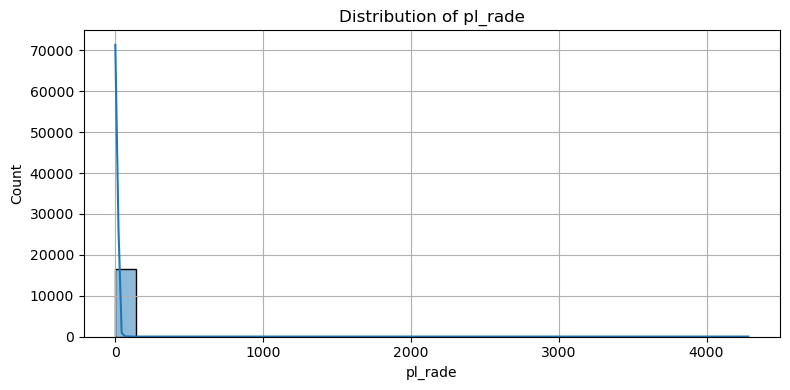

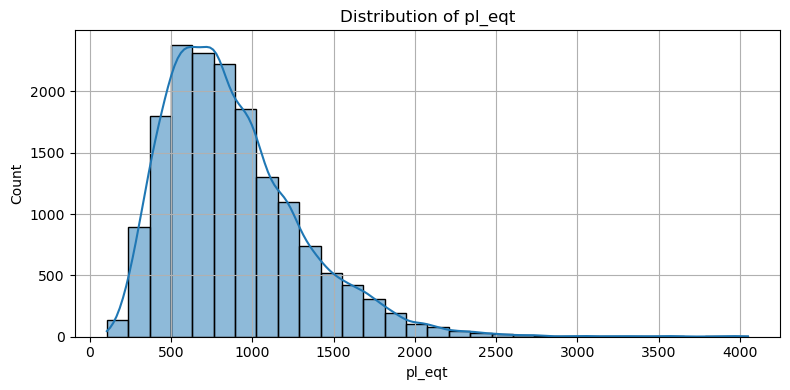

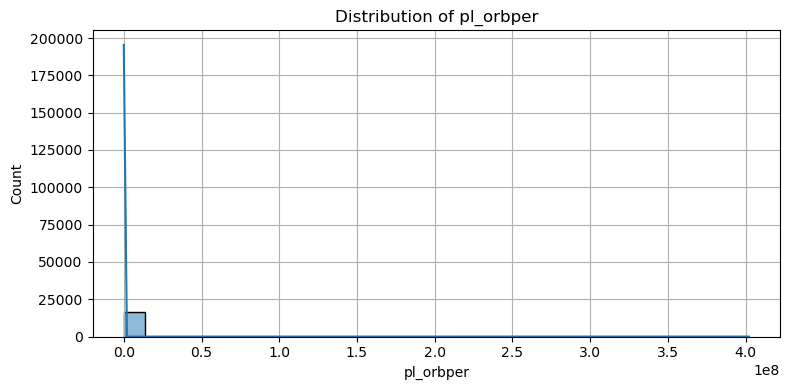

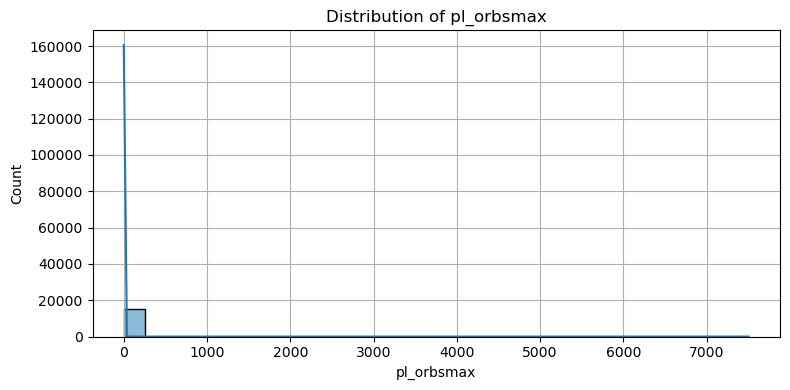

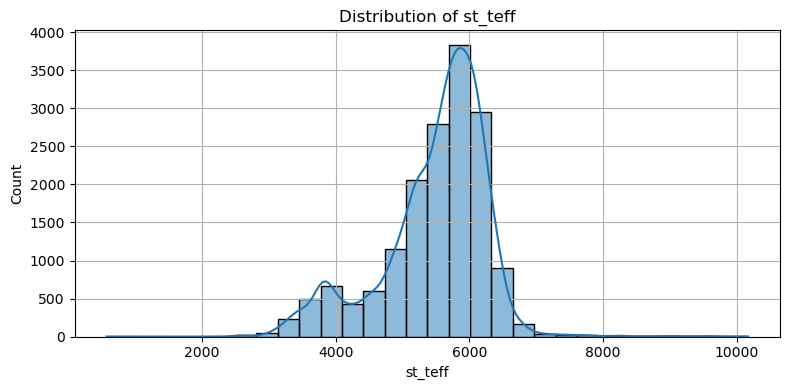

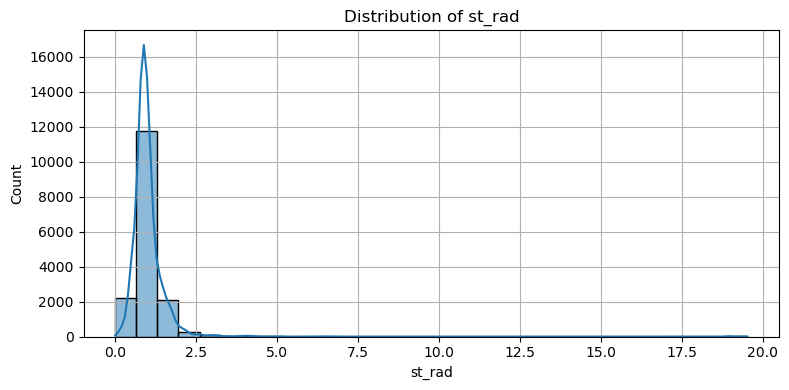

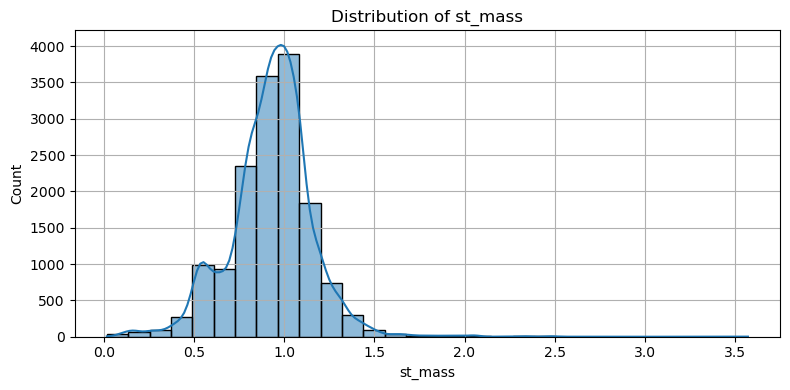

In [157]:
import seaborn as sns


features = ['pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Let's get rid of the absurd values in the rade and pl_orb areas

In [158]:
# Define your filtering conditions
condition = (
    (df['pl_rade'] <= 150) &
    (df['pl_orbper'] <= 3000) &
    (df['pl_orbsmax'] <= 300)
)

# Apply the filter
df_cleaned = df[condition].copy()

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(df_cleaned)}")

Original rows: 16494
Filtered rows: 15163


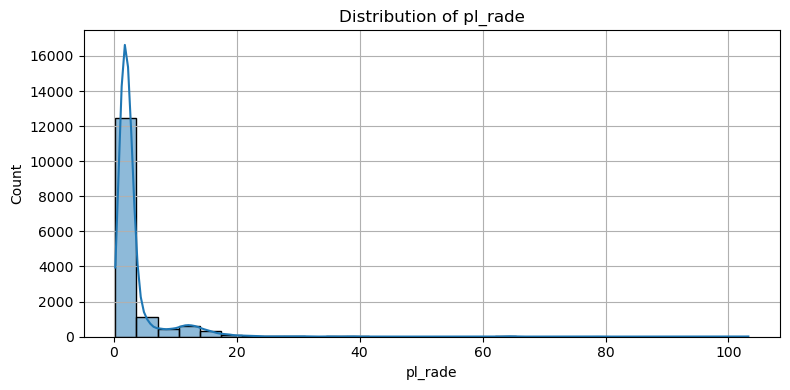

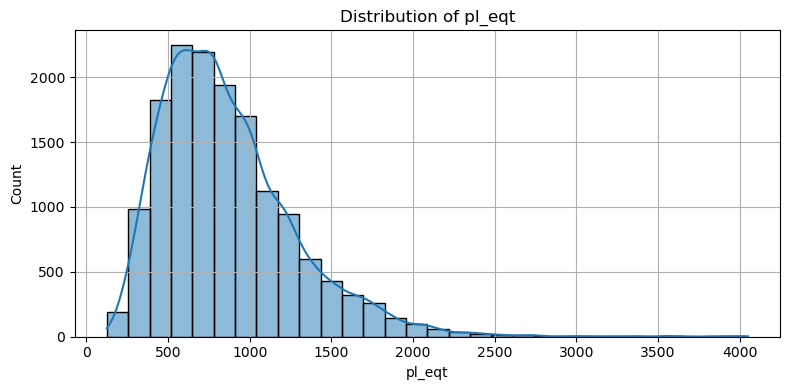

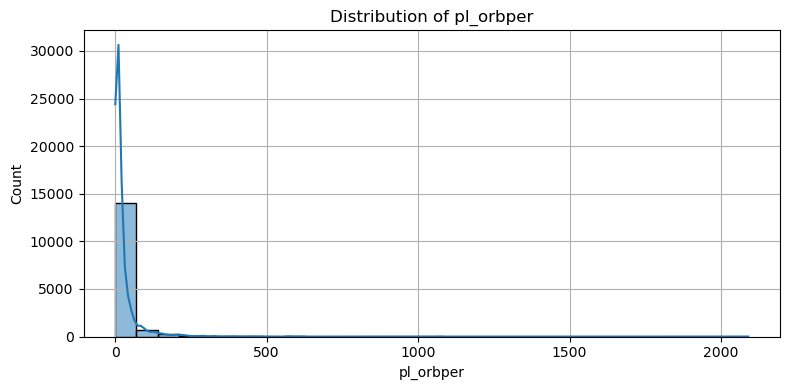

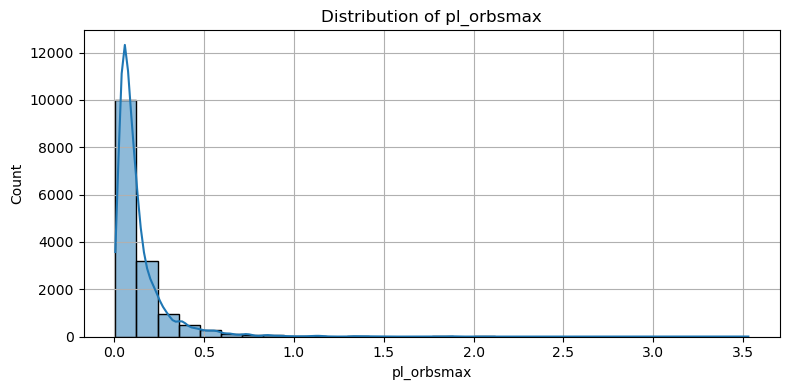

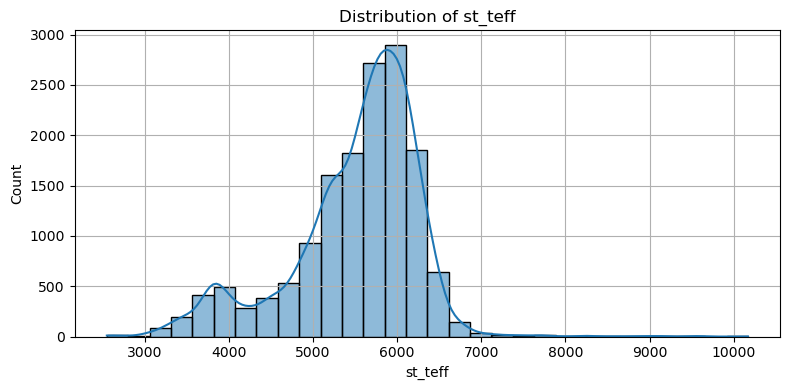

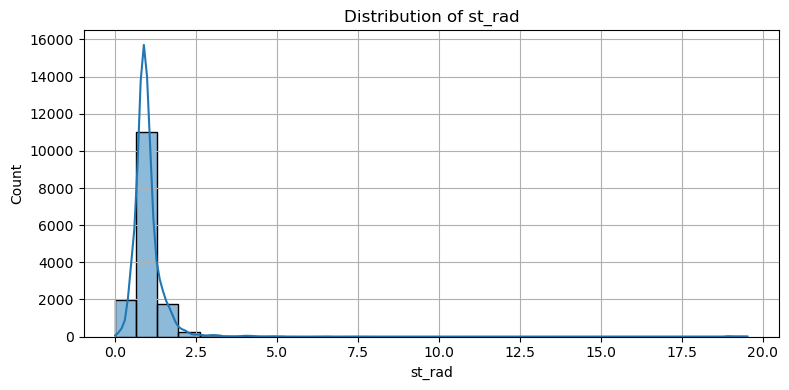

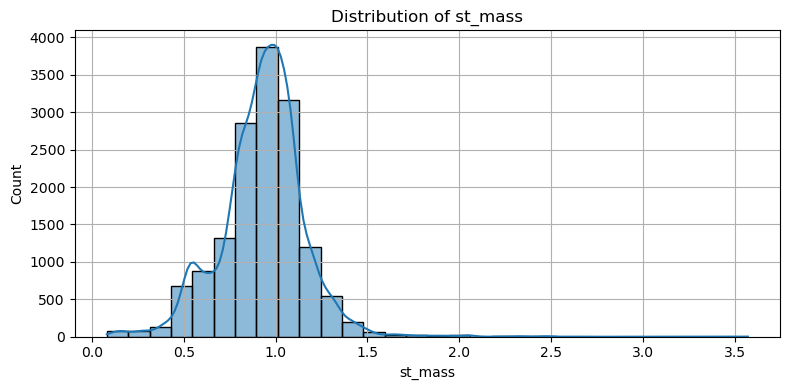

In [159]:
import seaborn as sns


features = ['pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


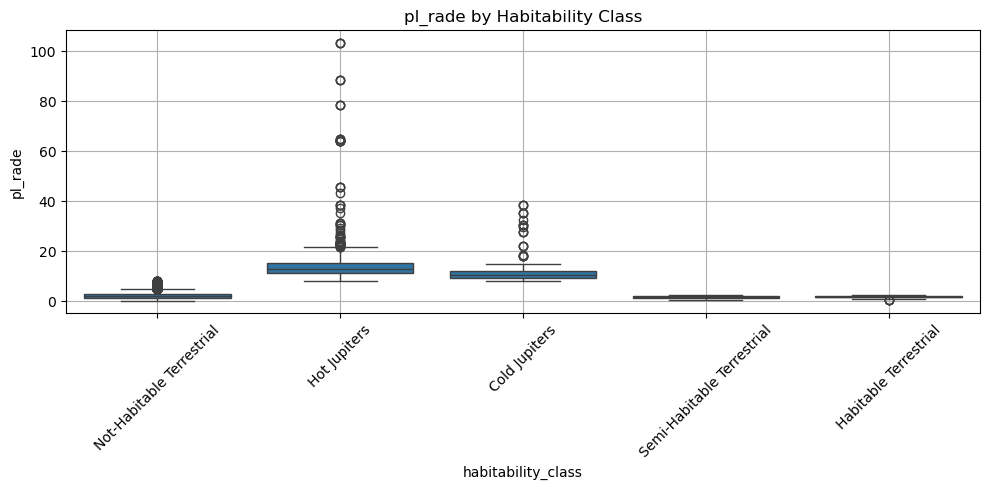

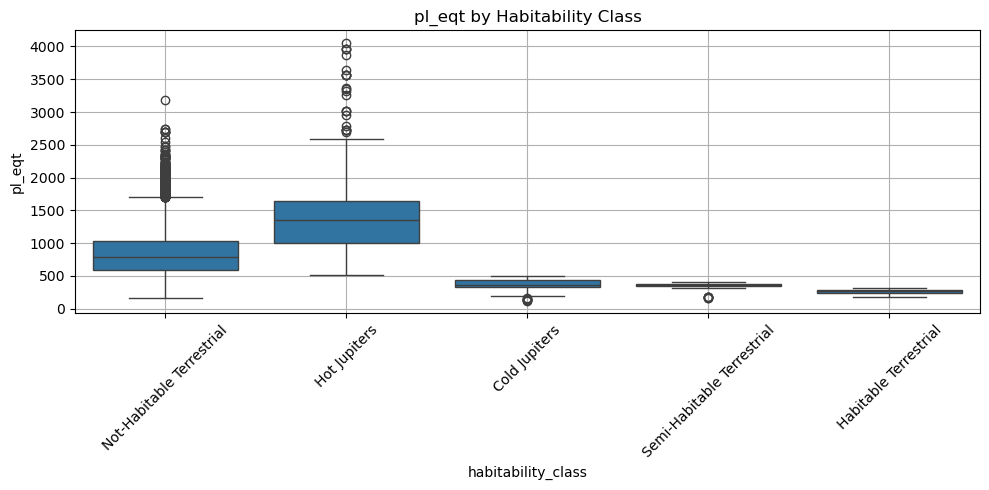

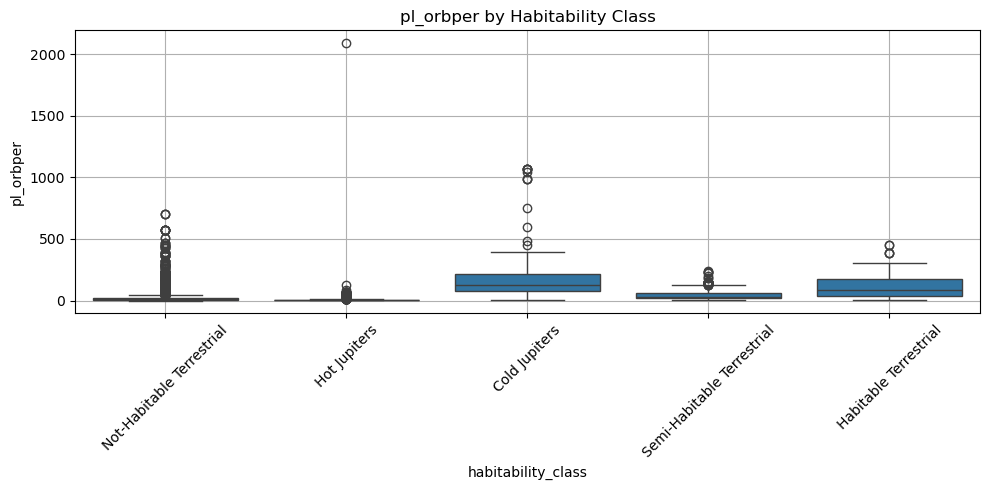

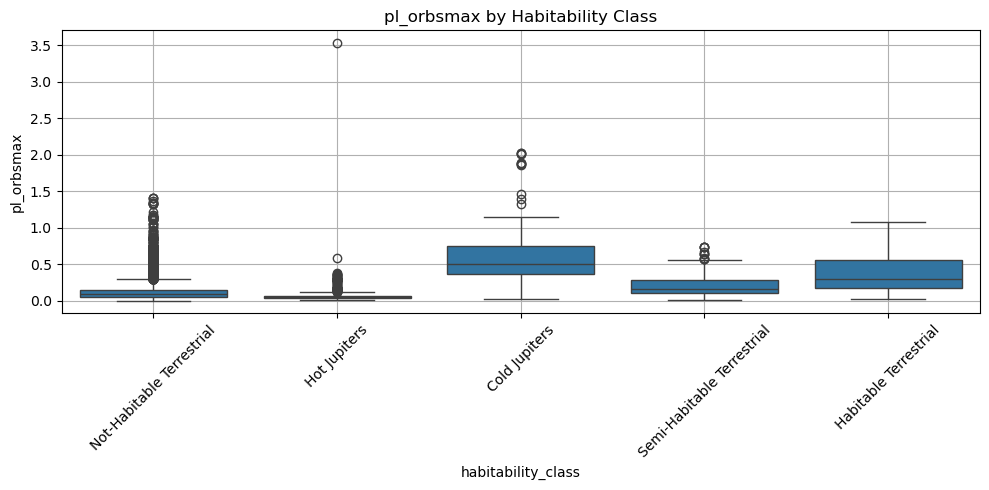

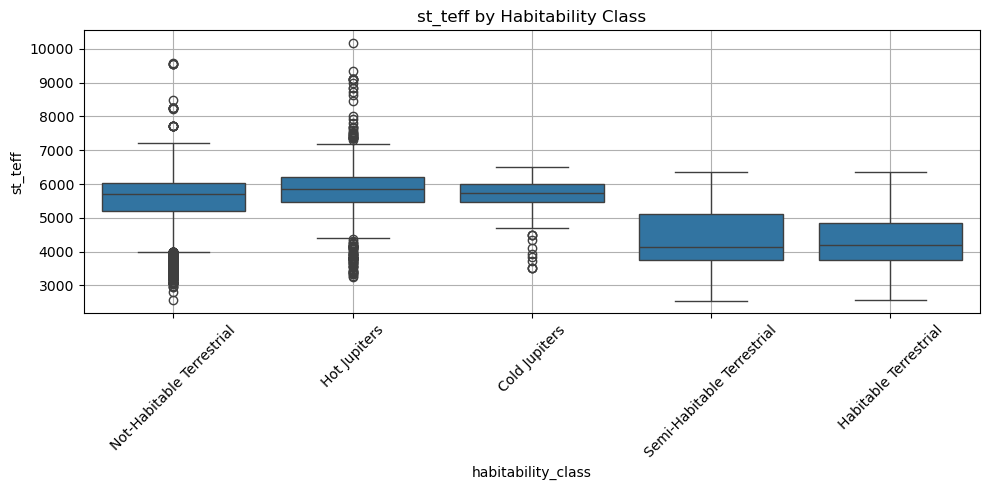

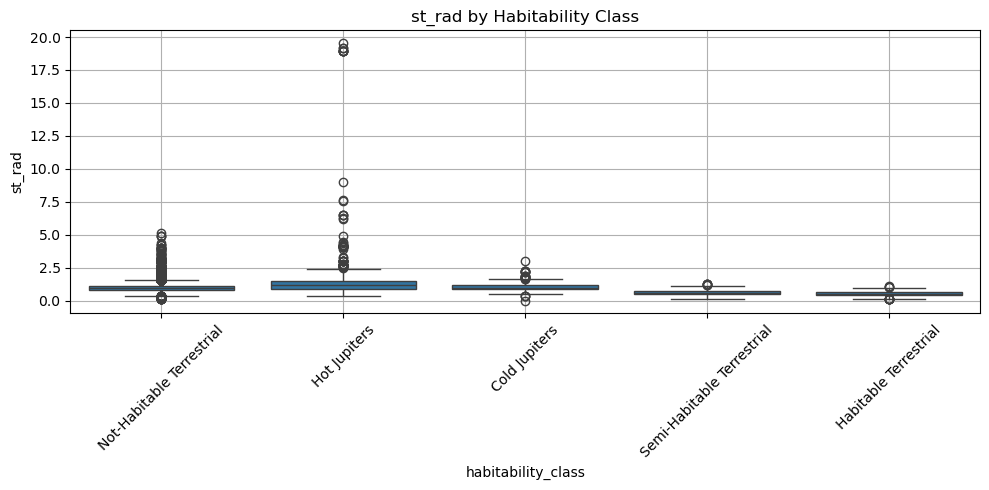

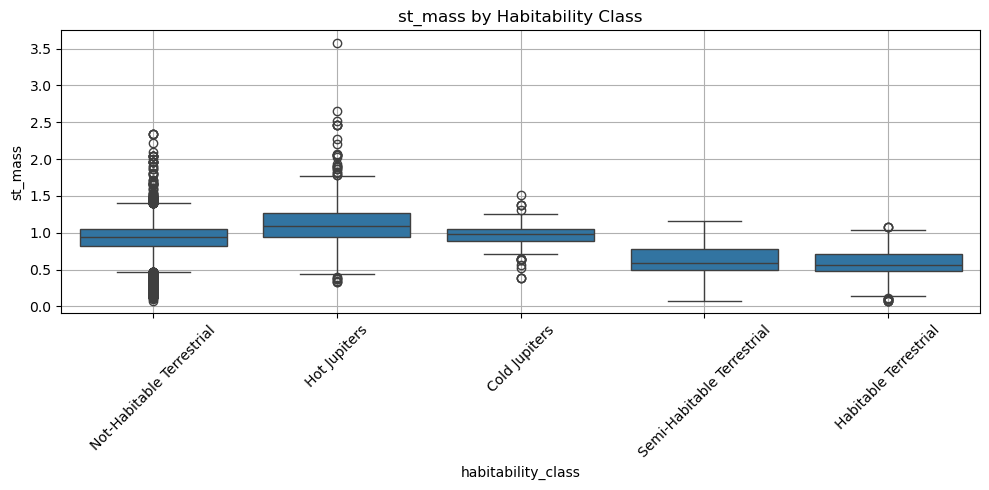

In [160]:
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned, x='habitability_class', y=feature)
    plt.title(f'{feature} by Habitability Class')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [161]:
df_cleaned.to_csv('exoplanets_cleaned.csv', index=False)

In [162]:
label_encoder = LabelEncoder()
df = df_cleaned.copy()
df['habitability_encoded'] = label_encoder.fit_transform(df['habitability_class'])

X = df[['pl_rade', 'pl_eqt', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_rad', 'st_mass']].copy()
y = df['habitability_encoded']


In [163]:
for column in X.columns:
    median = X[column].median()
    X[column] = X[column].fillna(median)

In [164]:
nan_df = X.isnull().sum() * 100 / (X.count() + X.isnull().sum())
nan_df

pl_rade       0.0
pl_eqt        0.0
pl_orbper     0.0
pl_orbsmax    0.0
st_teff       0.0
st_rad        0.0
st_mass       0.0
dtype: float64

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [166]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


c:\Users\dam10\OneDrive\Documents\GitHub\DS-3001\.conda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [168]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [169]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                            precision    recall  f1-score   support

             Cold Jupiters       0.91      0.88      0.89        33
     Habitable Terrestrial       0.90      0.96      0.93        54
              Hot Jupiters       0.95      1.00      0.97       257
 Not-Habitable Terrestrial       1.00      0.98      0.99      2602
Semi-Habitable Terrestrial       0.75      0.94      0.84        87

                  accuracy                           0.98      3033
                 macro avg       0.90      0.95      0.92      3033
              weighted avg       0.98      0.98      0.98      3033

Confusion Matrix:
[[  29    0    1    3    0]
 [   0   52    0    0    2]
 [   0    0  256    1    0]
 [   3    3   13 2558   25]
 [   0    3    0    2   82]]


<Figure size 1000x1000 with 0 Axes>

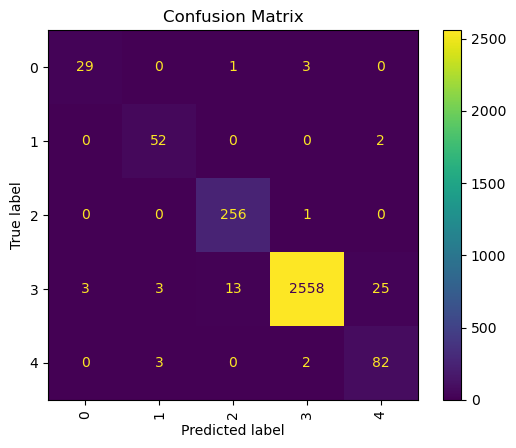

In [170]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [171]:
k_values = range(1, 100)
f1 = []

for k in k_values:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_balanced, y_train_balanced)
# y_pred = knn.predict(X_test_scaled)

    knn_updated = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_updated.fit(X_train_balanced, y_train_balanced)
    y_pred_updated = knn_updated.predict(X_test_scaled)
    f1.append(f1_score(y_test, y_pred_updated, average='weighted'))
    # accuracies_updated.append(accuracy_score(y_test, y_pred_knn_updated))

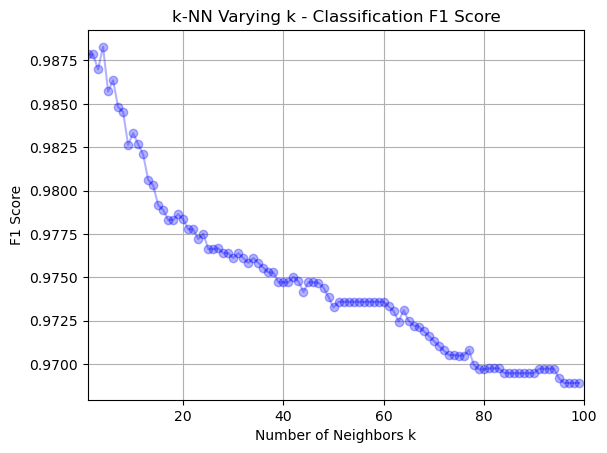

In [172]:
plt.plot(k_values, f1, marker='o', linestyle='-', color='b', alpha=0.3)
plt.title('k-NN Varying k - Classification F1 Score')
plt.xlabel('Number of Neighbors k')
plt.xlim(1, 100)
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

Classification Report:
accuracy_score: 0.987800857237059
precision_score: 0.987922241278611
recall_score: 0.987800857237059
f1_score: 0.9878458751523085


<Figure size 1000x1000 with 0 Axes>

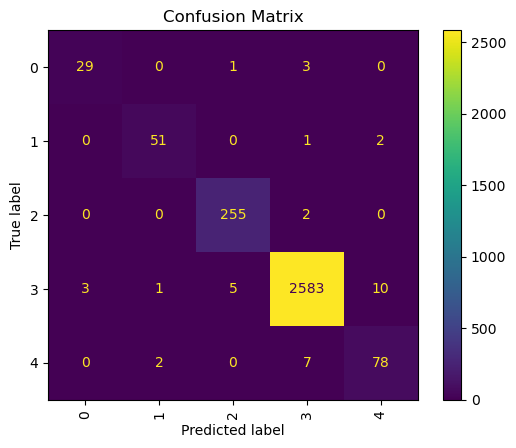

In [173]:
# Want to look at F1 score:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"recall_score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_pred, average='weighted')}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
accuracy_score: 0.9891196834817013
precision_score: 0.9891169607268963
recall_score: 0.9891196834817013
f1_score: 0.9890735553720496


<Figure size 1000x1000 with 0 Axes>

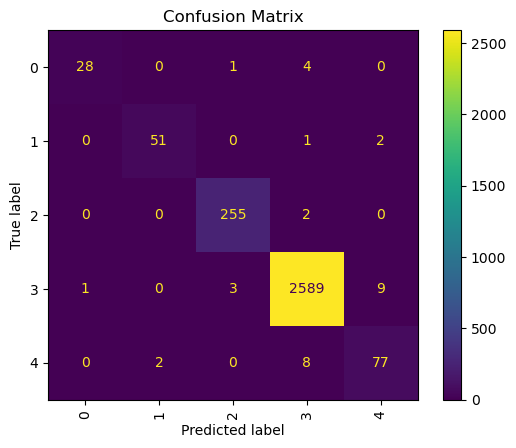

In [174]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"recall_score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_pred, average='weighted')}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearch with 5-fold cross-validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)

# Best combo
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best CV score: 0.9981101147430333


Classification Report:
accuracy_score: 0.988399071925754
precision_score: 0.9889081877617321
recall_score: 0.988399071925754
f1_score: 0.9885800379388474


<Figure size 1000x1000 with 0 Axes>

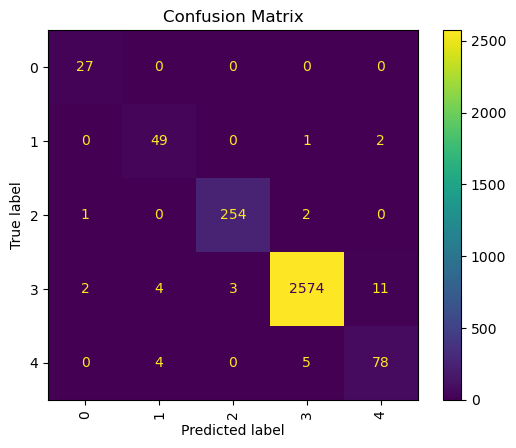

In [144]:
# Want to look at F1 score:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean')
knn.fit(X_train_balanced, y_train_balanced)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"recall_score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"f1_score: {f1_score(y_test, y_pred, average='weighted')}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()